In [ ]:
WeatherPy 
The below script explores the relationship between weather condition and distance from latitude.
In this script, we retrieved and plotted data for randomly selected 500 cities. 
We used Pandas, Numpy, Matplotlib, Requests, open weather API to accomplish our task.

Based on the analysis followins are observed:
    1. max tempaerature is higher in cities closer to equator (latitude 0) .
    2. Humidity decreses closer to equator
    3. windspeed reduces in cities closer to equator

In [226]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import pprint
import csv

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/output_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


plt.style.use('seaborn')


## Generate Cities List

In [217]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

## Perform API Calls

In [218]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 


In [219]:
city=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat = []
lng = []
max_temp = []
wind_speed=[]
counter = 0

# Loop through the list of cities and perform a request for data on each
print("Begining Data Retrieval")
print("----------------------------------------------------")
for c in cities: 
    counter = counter +1
    try:
         print(f"Processing Record {counter} of Set 1|{c}")
         query_url =f"{url}&q={c}"
         print(query_url)
         weather_response = requests.get(query_url).json()
         print(f"The weather API responded with: {weather_response}.")
         #pp = pprint.PrettyPrinter(indent=4)
         #pp.pprint(weather_response)
    
         city.append(weather_response["name"])
         cloudiness.append(weather_response["clouds"]["all"])
         country.append(weather_response["sys"]["country"])
         date.append(weather_response["dt"])
         humidity.append(weather_response["main"]["humidity"])
         lat.append(weather_response["coord"]["lat"])
         lng.append(weather_response["coord"]["lon"])
         max_temp.append(weather_response["main"]["temp_max"])
         wind_speed.append(weather_response["wind"]["speed"])
    except KeyError:
          print(KeyError)
          print("Moving to next API call for a different city")    
 
    

Begining Data Retrieval
----------------------------------------------------
Processing Record 1 of Set 1|polis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=polis
The weather API responded with: {'coord': {'lon': 32.42, 'lat': 35.04}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.2, 'pressure': 1007, 'humidity': 66, 'temp_min': 84.2, 'temp_max': 84.2}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 240}, 'clouds': {'all': 40}, 'dt': 1536217200, 'sys': {'type': 1, 'id': 5450, 'message': 0.0087, 'country': 'CY', 'sunrise': 1536204400, 'sunset': 1536250201}, 'id': 146137, 'name': 'Polis', 'cod': 200}.
Processing Record 2 of Set 1|skjervoy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=skjervoy
The weather API responded with: {'coord': {'lon': 20.97, 'lat': 70.03}, 'weather': [{'id': 8

The weather API responded with: {'coord': {'lon': -65.72, 'lat': 66.15}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 38.3, 'pressure': 1000.12, 'humidity': 77, 'temp_min': 38.3, 'temp_max': 38.3, 'sea_level': 1018.49, 'grnd_level': 1000.12}, 'wind': {'speed': 7.96, 'deg': 76.5018}, 'clouds': {'all': 0}, 'dt': 1536220003, 'sys': {'message': 0.0037, 'country': 'CA', 'sunrise': 1536225300, 'sunset': 1536276304}, 'id': 6096551, 'name': 'Pangnirtung', 'cod': 200}.
Processing Record 14 of Set 1|faya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=faya
The weather API responded with: {'coord': {'lon': 42.45, 'lat': 18.39}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 81.48, 'pressure': 1025, 'humidity': 32, 'temp_min': 80.6, 'temp_max': 82.4}, 'visibility': 10000, 'wind': {'speed': 11

The weather API responded with: {'coord': {'lon': -53.67, 'lat': 66.94}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 32.9, 'pressure': 979.21, 'humidity': 100, 'temp_min': 32.9, 'temp_max': 32.9, 'sea_level': 1014.88, 'grnd_level': 979.21}, 'wind': {'speed': 1.81, 'deg': 133.502}, 'rain': {'3h': 0.1525}, 'clouds': {'all': 56}, 'dt': 1536220007, 'sys': {'message': 0.0035, 'country': 'GL', 'sunrise': 1536222247, 'sunset': 1536273569}, 'id': 3419842, 'name': 'Sisimiut', 'cod': 200}.
Processing Record 27 of Set 1|vaitupu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=vaitupu
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 28 of Set 1|port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&

The weather API responded with: {'coord': {'lon': 26.89, 'lat': -33.59}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 55.31, 'pressure': 1024.44, 'humidity': 100, 'temp_min': 55.31, 'temp_max': 55.31, 'sea_level': 1033.4, 'grnd_level': 1024.44}, 'wind': {'speed': 13.33, 'deg': 254.502}, 'rain': {'3h': 2.1}, 'clouds': {'all': 92}, 'dt': 1536220012, 'sys': {'message': 0.0031, 'country': 'ZA', 'sunrise': 1536207824, 'sunset': 1536249493}, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}.
Processing Record 40 of Set 1|mar del plata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=mar del plata
The weather API responded with: {'coord': {'lon': -67.52, 'lat': -46.43}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 46.58, 'pressure': 992.1, 'humidity': 59, 'temp_min': 46.58, 'temp

The weather API responded with: {'coord': {'lon': -114.38, 'lat': 62.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 30.2, 'pressure': 1028, 'humidity': 86, 'temp_min': 30.2, 'temp_max': 30.2}, 'visibility': 24140, 'wind': {'speed': 2.24, 'deg': 160}, 'clouds': {'all': 5}, 'dt': 1536217200, 'sys': {'type': 1, 'id': 3558, 'message': 0.0083, 'country': 'CA', 'sunrise': 1536237607, 'sunset': 1536287372}, 'id': 6185377, 'name': 'Yellowknife', 'cod': 200}.
Processing Record 52 of Set 1|hermanus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hermanus
The weather API responded with: {'coord': {'lon': 19.24, 'lat': -34.42}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 49.1, 'pressure': 994.77, 'humidity': 81, 'temp_min': 49.1, 'temp_max': 49.1, 'sea_level': 1035.43, 'grnd_level': 994

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 65 of Set 1|altamira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=altamira
The weather API responded with: {'coord': {'lon': -52.21, 'lat': -3.2}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1016.82, 'humidity': 89, 'temp_min': 75.2, 'temp_max': 75.2, 'sea_level': 1025.74, 'grnd_level': 1016.82}, 'wind': {'speed': 4.27, 'deg': 28.0018}, 'clouds': {'all': 32}, 'dt': 1536220023, 'sys': {'message': 0.0035, 'country': 'BR', 'sunrise': 1536225912, 'sunset': 1536269338}, 'id': 3407882, 'name': 'Altamira', 'cod': 200}.
Processing Record 66 of Set 1|the valley
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=the valley
The w

The weather API responded with: {'coord': {'lon': 18.42, 'lat': -33.93}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 50, 'pressure': 1022, 'humidity': 81, 'temp_min': 50, 'temp_max': 50}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 30}, 'clouds': {'all': 75}, 'dt': 1536217200, 'sys': {'type': 1, 'id': 6529, 'message': 0.0035, 'country': 'ZA', 'sunrise': 1536209867, 'sunset': 1536251515}, 'id': 3369157, 'name': 'Cape Town', 'cod': 200}.
Processing Record 78 of Set 1|berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=berlevag
The weather API responded with: {'coord': {'lon': 29.09, 'lat': 70.86}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 1023, 'humidity': 66, 'temp_min': 51.8, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 10.29, 

The weather API responded with: {'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.11, 'pressure': 1016.17, 'humidity': 58, 'temp_min': 57.11, 'temp_max': 57.11, 'sea_level': 1023.92, 'grnd_level': 1016.17}, 'wind': {'speed': 8.86, 'deg': 172.002}, 'clouds': {'all': 92}, 'dt': 1536220032, 'sys': {'message': 0.0037, 'country': 'RU', 'sunrise': 1536170119, 'sunset': 1536222518}, 'id': 2126199, 'name': 'Cherskiy', 'cod': 200}.
Processing Record 91 of Set 1|taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=taolanaro
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 92 of Set 1|saint-philippe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=saint-ph

The weather API responded with: {'coord': {'lon': 150.17, 'lat': 59.7}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1012, 'humidity': 93, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 13.42, 'deg': 100, 'gust': 11}, 'clouds': {'all': 90}, 'dt': 1536217200, 'sys': {'type': 1, 'id': 7243, 'message': 0.0033, 'country': 'RU', 'sunrise': 1536174367, 'sunset': 1536223670}, 'id': 2127060, 'name': 'Arman', 'cod': 200}.
Processing Record 105 of Set 1|cabra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cabra
The weather API responded with: {'coord': {'lon': -4.43, 'lat': 37.47}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 64.24, 'pressure': 1015, 'humidity': 77, 'temp_min': 60.8, 'temp_max': 68}, 'visibility': 10000, 'wind

The weather API responded with: {'coord': {'lon': -27.07, 'lat': 38.73}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1022, 'humidity': 88, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 7.18, 'deg': 156.002}, 'clouds': {'all': 40}, 'dt': 1536217200, 'sys': {'type': 1, 'id': 5951, 'message': 0.0035, 'country': 'PT', 'sunrise': 1536218518, 'sunset': 1536264626}, 'id': 3372760, 'name': 'Praia da Vitoria', 'cod': 200}.
Processing Record 118 of Set 1|oranjemund
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=oranjemund
The weather API responded with: {'coord': {'lon': 16.43, 'lat': -28.55}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 55.67, 'pressure': 1036.92, 'humidity': 98, 'temp_min': 55.67, 'temp_max': 55.67, 'sea_lev

The weather API responded with: {'coord': {'lon': 20.79, 'lat': -6.42}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 79.07, 'pressure': 956.75, 'humidity': 81, 'temp_min': 79.07, 'temp_max': 79.07, 'sea_level': 1024.45, 'grnd_level': 956.75}, 'wind': {'speed': 2.82, 'deg': 289.002}, 'clouds': {'all': 32}, 'dt': 1536220048, 'sys': {'message': 0.0038, 'country': 'CD', 'sunrise': 1536208483, 'sunset': 1536251738}, 'id': 204953, 'name': 'Tshikapa', 'cod': 200}.
Processing Record 133 of Set 1|sainte-marie
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sainte-marie
The weather API responded with: {'coord': {'lon': -71.03, 'lat': 46.45}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 74.26, 'pressure': 1011, 'humidity': 78, 'temp_min': 73.4, 'temp_max': 75.2}, 'visibilit

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 145 of Set 1|adrar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=adrar
The weather API responded with: {'coord': {'lon': -0.29, 'lat': 27.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 87.8, 'pressure': 1010, 'humidity': 19, 'temp_min': 87.8, 'temp_max': 87.8}, 'visibility': 10000, 'wind': {'speed': 12.75, 'deg': 100}, 'clouds': {'all': 0}, 'dt': 1536217200, 'sys': {'type': 1, 'id': 6220, 'message': 0.0038, 'country': 'DZ', 'sunrise': 1536212536, 'sunset': 1536257770}, 'id': 2508813, 'name': 'Adrar', 'cod': 200}.
Processing Record 146 of Set 1|evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=evensk
The weather API responded with: {'co

The weather API responded with: {'coord': {'lon': -13.05, 'lat': 20.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 89.33, 'pressure': 994.53, 'humidity': 43, 'temp_min': 89.33, 'temp_max': 89.33, 'sea_level': 1024.16, 'grnd_level': 994.53}, 'wind': {'speed': 4.16, 'deg': 282.502}, 'clouds': {'all': 0}, 'dt': 1536220058, 'sys': {'message': 0.0035, 'country': 'MR', 'sunrise': 1536215848, 'sunset': 1536260589}, 'id': 2381334, 'name': 'Atar', 'cod': 200}.
Processing Record 160 of Set 1|iqaluit
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=iqaluit
The weather API responded with: {'coord': {'lon': -68.52, 'lat': 63.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 37.4, 'pressure': 1005, 'humidity': 86, 'temp_min': 37.4, 'temp_max': 37.4}, 'visibility': 24140, 'wind': {'speed': 8

The weather API responded with: {'coord': {'lon': 92.75, 'lat': 11.67}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 83.84, 'pressure': 1019.82, 'humidity': 95, 'temp_min': 83.84, 'temp_max': 83.84, 'sea_level': 1020.07, 'grnd_level': 1019.82}, 'wind': {'speed': 16.46, 'deg': 238.002}, 'clouds': {'all': 0}, 'dt': 1536220063, 'sys': {'message': 0.0045, 'country': 'IN', 'sunrise': 1536190721, 'sunset': 1536234952}, 'id': 1259385, 'name': 'Port Blair', 'cod': 200}.
Processing Record 173 of Set 1|mallapuram
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=mallapuram
The weather API responded with: {'coord': {'lon': 78.27, 'lat': 11.97}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 91.4, 'pressure': 965.75, 'humidity': 48, 'temp_min': 91.4, 'temp_max': 91.4, 'sea_level': 1018.

The weather API responded with: {'coord': {'lon': 136.42, 'lat': -13.85}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 79.7, 'pressure': 1023.3, 'humidity': 84, 'temp_min': 79.7, 'temp_max': 79.7, 'sea_level': 1023.72, 'grnd_level': 1023.3}, 'wind': {'speed': 14, 'deg': 58.5018}, 'clouds': {'all': 0}, 'dt': 1536220067, 'sys': {'message': 0.0033, 'country': 'AU', 'sunrise': 1536180945, 'sunset': 1536223792}, 'id': 2079582, 'name': 'Alyangula', 'cod': 200}.
Processing Record 185 of Set 1|birao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=birao
The weather API responded with: {'coord': {'lon': 22.78, 'lat': 10.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 83.57, 'pressure': 967.05, 'humidity': 100, 'temp_min': 83.57, 'temp_max': 83.57, 'sea_level': 1023.92, 'grnd_level': 967.

The weather API responded with: {'coord': {'lon': 22.13, 'lat': -30.97}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 36.59, 'pressure': 874.56, 'humidity': 100, 'temp_min': 36.59, 'temp_max': 36.59, 'sea_level': 1032.11, 'grnd_level': 874.56}, 'wind': {'speed': 4.5, 'deg': 186.002}, 'rain': {'3h': 7.0075}, 'clouds': {'all': 92}, 'dt': 1536220073, 'sys': {'message': 0.0032, 'country': 'ZA', 'sunrise': 1536208874, 'sunset': 1536250725}, 'id': 1014034, 'name': 'Carnarvon', 'cod': 200}.
Processing Record 199 of Set 1|oum hadjer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=oum hadjer
The weather API responded with: {'coord': {'lon': 19.7, 'lat': 13.3}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 91.4, 'pressure': 978.96, 'humidity': 59, 'temp_min': 91.4, 'temp_max': 91.4, '

The weather API responded with: {'coord': {'lon': -122.75, 'lat': 53.92}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 41, 'pressure': 1020, 'humidity': 93, 'temp_min': 41, 'temp_max': 41}, 'visibility': 14484, 'wind': {'speed': 2.15, 'deg': 321.502}, 'clouds': {'all': 1}, 'dt': 1536217200, 'sys': {'type': 1, 'id': 3324, 'message': 0.003, 'country': 'CA', 'sunrise': 1536240549, 'sunset': 1536288479}, 'id': 6113365, 'name': 'Prince George', 'cod': 200}.
Processing Record 211 of Set 1|richards bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=richards bay
The weather API responded with: {'coord': {'lon': 32.06, 'lat': -28.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 75.65, 'pressure': 1011.23, 'humidity': 66, 'temp_min': 75.65, 'temp_max': 75.65, 'sea_level': 1028.99, 'grnd

The weather API responded with: {'coord': {'lon': 14.43, 'lat': 27.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 95.72, 'pressure': 978.32, 'humidity': 18, 'temp_min': 95.72, 'temp_max': 95.72, 'sea_level': 1028.38, 'grnd_level': 978.32}, 'wind': {'speed': 10.2, 'deg': 124.002}, 'clouds': {'all': 0}, 'dt': 1536220084, 'sys': {'message': 0.0026, 'country': 'LY', 'sunrise': 1536209033, 'sunset': 1536254211}, 'id': 2212775, 'name': 'Sabha', 'cod': 200}.
Processing Record 224 of Set 1|aksum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=aksum
The weather API responded with: {'coord': {'lon': 38.72, 'lat': 14.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 72.5, 'pressure': 831.76, 'humidity': 89, 'temp_min': 72.5, 'temp_max': 72.5, 'sea_level': 1021.77, 'grnd_level': 831.76},

The weather API responded with: {'coord': {'lon': 14.28, 'lat': -22.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 56.12, 'pressure': 1022.49, 'humidity': 95, 'temp_min': 56.12, 'temp_max': 56.12, 'sea_level': 1036.2, 'grnd_level': 1022.49}, 'wind': {'speed': 18.37, 'deg': 161.002}, 'clouds': {'all': 8}, 'dt': 1536220089, 'sys': {'message': 0.0029, 'country': 'NA', 'sunrise': 1536210478, 'sunset': 1536252879}, 'id': 3356832, 'name': 'Henties Bay', 'cod': 200}.
Processing Record 237 of Set 1|jalingo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=jalingo
The weather API responded with: {'coord': {'lon': 10.93, 'lat': 10.3}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 977.42, 'humidity': 100, 'temp_min': 75.2, 'temp_max': 75.2, 'sea_level': 1024.45, 'grnd_lev

The weather API responded with: {'coord': {'lon': -61.45, 'lat': 10.24}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 79.79, 'pressure': 1022, 'humidity': 84, 'temp_min': 79.79, 'temp_max': 79.79, 'sea_level': 1025.58, 'grnd_level': 1022}, 'wind': {'speed': 3.15, 'deg': 69.0018}, 'clouds': {'all': 92}, 'dt': 1536220094, 'sys': {'message': 0.0034, 'country': 'TT', 'sunrise': 1536227769, 'sunset': 1536271904}, 'id': 3573739, 'name': 'Esperance', 'cod': 200}.
Processing Record 250 of Set 1|tuatapere
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tuatapere
The weather API responded with: {'coord': {'lon': 167.69, 'lat': -46.13}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 43.52, 'pressure': 1013.01, 'humidity': 100, 'temp_min': 43.52, 'temp_max': 43.52, 'sea_level': 1038.92

The weather API responded with: {'coord': {'lon': 161.92, 'lat': -10.46}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 82.85, 'pressure': 1020.22, 'humidity': 99, 'temp_min': 82.85, 'temp_max': 82.85, 'sea_level': 1023.23, 'grnd_level': 1020.22}, 'wind': {'speed': 10.09, 'deg': 137.502}, 'clouds': {'all': 20}, 'dt': 1536220098, 'sys': {'message': 0.003, 'country': 'SB', 'sunrise': 1536174734, 'sunset': 1536217764}, 'id': 2178753, 'name': 'Kirakira', 'cod': 200}.
Processing Record 262 of Set 1|eyl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=eyl
The weather API responded with: {'coord': {'lon': 49.82, 'lat': 7.98}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 84.74, 'pressure': 1013.66, 'humidity': 60, 'temp_min': 84.74, 'temp_max': 84.74, 'sea_level': 1024.81, 'grnd_level':

The weather API responded with: {'coord': {'lon': 18.62, 'lat': 7.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 82.85, 'pressure': 978.96, 'humidity': 96, 'temp_min': 82.85, 'temp_max': 82.85, 'sea_level': 1023.92, 'grnd_level': 978.96}, 'wind': {'speed': 7.96, 'deg': 201.002}, 'clouds': {'all': 0}, 'dt': 1536220103, 'sys': {'message': 0.0029, 'country': 'CF', 'sunrise': 1536208624, 'sunset': 1536252626}, 'id': 2386042, 'name': 'Kabo', 'cod': 200}.
Processing Record 275 of Set 1|chernyshevskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=chernyshevskiy
The weather API responded with: {'coord': {'lon': 112.47, 'lat': 63.01}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 42.62, 'pressure': 988.21, 'humidity': 58, 'temp_min': 42.62, 'temp_max': 42.62, 'sea_level': 1026.7

The weather API responded with: {'coord': {'lon': -108.73, 'lat': 42.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.5, 'pressure': 1026, 'humidity': 34, 'temp_min': 55.4, 'temp_max': 62.06}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 230}, 'clouds': {'all': 1}, 'dt': 1536217800, 'sys': {'type': 1, 'id': 3084, 'message': 0.0037, 'country': 'US', 'sunrise': 1536237924, 'sunset': 1536284401}, 'id': 5830007, 'name': 'Lander', 'cod': 200}.
Processing Record 287 of Set 1|canmore
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=canmore
The weather API responded with: {'coord': {'lon': -115.35, 'lat': 51.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 44.6, 'pressure': 1023, 'humidity': 70, 'temp_min': 44.6, 'temp_max': 44.6}, 'visibility': 14484, 'wind': {'speed': 1.7, 

The weather API responded with: {'coord': {'lon': 81.12, 'lat': 6.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 85.55, 'pressure': 1019.25, 'humidity': 82, 'temp_min': 85.55, 'temp_max': 85.55, 'sea_level': 1021.85, 'grnd_level': 1019.25}, 'wind': {'speed': 20.15, 'deg': 248.502}, 'clouds': {'all': 0}, 'dt': 1536220112, 'sys': {'message': 0.0038, 'country': 'LK', 'sunrise': 1536193669, 'sunset': 1536237590}, 'id': 1244926, 'name': 'Hambantota', 'cod': 200}.
Processing Record 300 of Set 1|atherton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=atherton
The weather API responded with: {'coord': {'lon': -2.49, 'lat': 53.52}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 56.32, 'pressure': 1017, 'humidity': 81, 'temp_min': 53.6, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 313 of Set 1|laguna
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=laguna
The weather API responded with: {'coord': {'lon': -110.01, 'lat': 27.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.64, 'pressure': 1003.61, 'humidity': 91, 'temp_min': 76.64, 'temp_max': 76.64, 'sea_level': 1024.57, 'grnd_level': 1003.61}, 'wind': {'speed': 0.81, 'deg': 94.5018}, 'clouds': {'all': 0}, 'dt': 1536220118, 'sys': {'message': 0.0039, 'country': 'MX', 'sunrise': 1536238890, 'sunset': 1536284070}, 'id': 4013704, 'name': 'Laguna', 'cod': 200}.
Processing Record 314 of Set 1|shimoda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=shimoda
The weather API res

The weather API responded with: {'coord': {'lon': 24.1, 'lat': 45.1}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 72.68, 'pressure': 973.21, 'humidity': 76, 'temp_min': 72.68, 'temp_max': 72.68, 'sea_level': 1024, 'grnd_level': 973.21}, 'wind': {'speed': 2.59, 'deg': 268.502}, 'clouds': {'all': 20}, 'dt': 1536220123, 'sys': {'message': 0.004, 'country': 'RO', 'sunrise': 1536205892, 'sunset': 1536252686}, 'id': 685981, 'name': 'Manta', 'cod': 200}.
Processing Record 327 of Set 1|kutum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kutum
The weather API responded with: {'coord': {'lon': 24.66, 'lat': 14.2}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 83.57, 'pressure': 898.23, 'humidity': 57, 'temp_min': 83.57, 'temp_max': 83.57, 'sea_level': 1022.87, 'grnd_level': 898.23}, '

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 339 of Set 1|suileng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=suileng
The weather API responded with: {'coord': {'lon': 127.08, 'lat': 47.25}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 59.18, 'pressure': 985.37, 'humidity': 81, 'temp_min': 59.18, 'temp_max': 59.18, 'sea_level': 1010.26, 'grnd_level': 985.37}, 'wind': {'speed': 8.19, 'deg': 293.502}, 'rain': {'3h': 0.105}, 'clouds': {'all': 76}, 'dt': 1536220128, 'sys': {'message': 0.0044, 'country': 'CN', 'sunrise': 1536181021, 'sunset': 1536228133}, 'id': 2034651, 'name': 'Suileng', 'cod': 200}.
Processing Record 340 of Set 1|toamasina
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=t

The weather API responded with: {'coord': {'lon': 34.31, 'lat': 63.74}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 65.03, 'pressure': 1021.11, 'humidity': 89, 'temp_min': 65.03, 'temp_max': 65.03, 'sea_level': 1033.85, 'grnd_level': 1021.11}, 'wind': {'speed': 4.16, 'deg': 213.002}, 'clouds': {'all': 64}, 'dt': 1536220132, 'sys': {'message': 0.0038, 'country': 'RU', 'sunrise': 1536201660, 'sunset': 1536251956}, 'id': 497927, 'name': 'Segezha', 'cod': 200}.
Processing Record 353 of Set 1|rio grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=rio grande
The weather API responded with: {'coord': {'lon': -52.1, 'lat': -32.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 53.69, 'pressure': 1031.65, 'humidity': 94, 'temp_min': 53.69, 'temp_max': 53.69, 'sea_level': 1034.05

The weather API responded with: {'coord': {'lon': -63.6, 'lat': 50.23}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1006, 'humidity': 100, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 4828, 'wind': {'speed': 8.05, 'deg': 100}, 'clouds': {'all': 90}, 'dt': 1536218220, 'sys': {'type': 1, 'id': 3785, 'message': 0.0036, 'country': 'CA', 'sunrise': 1536226625, 'sunset': 1536274028}, 'id': 5972291, 'name': 'Havre-Saint-Pierre', 'cod': 200}.
Processing Record 366 of Set 1|tingrela
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=tingrela
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 367 of Set 1|samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperi

The weather API responded with: {'coord': {'lon': -58.74, 'lat': -38.55}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 57.92, 'pressure': 1020.46, 'humidity': 71, 'temp_min': 57.92, 'temp_max': 57.92, 'sea_level': 1026.27, 'grnd_level': 1020.46}, 'wind': {'speed': 10.09, 'deg': 307.502}, 'clouds': {'all': 0}, 'dt': 1536220143, 'sys': {'message': 0.0046, 'country': 'AR', 'sunrise': 1536228541, 'sunset': 1536269875}, 'id': 3430443, 'name': 'Necochea', 'cod': 200}.
Processing Record 383 of Set 1|cardoso
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=cardoso
The weather API responded with: {'coord': {'lon': -49.91, 'lat': -20.08}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.41, 'pressure': 978.32, 'humidity': 87, 'temp_min': 54.41, 'temp_max': 54.41, 'sea_level': 1032.03, 'grnd

The weather API responded with: {'coord': {'lon': 13.53, 'lat': 48.64}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 60.8, 'pressure': 1015, 'humidity': 82, 'temp_min': 60.8, 'temp_max': 60.8}, 'visibility': 8000, 'wind': {'speed': 1.12}, 'clouds': {'all': 20}, 'dt': 1536216600, 'sys': {'type': 1, 'id': 5932, 'message': 0.0036, 'country': 'AT', 'sunrise': 1536208206, 'sunset': 1536255436}, 'id': 3220813, 'name': 'Wanning', 'cod': 200}.
Processing Record 396 of Set 1|yarmouth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=yarmouth
The weather API responded with: {'coord': {'lon': -1.5, 'lat': 50.71}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 50.29, 'pressure': 1018, 'humidity': 87, 'temp_min': 48.2, 'temp_max': 51.8}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 320},

The weather API responded with: {'coord': {'lon': -115.79, 'lat': 60.82}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 33.8, 'pressure': 1029, 'humidity': 86, 'temp_min': 33.8, 'temp_max': 33.8}, 'visibility': 24140, 'wind': {'speed': 3.36, 'deg': 170}, 'clouds': {'all': 20}, 'dt': 1536217200, 'sys': {'type': 1, 'id': 3530, 'message': 0.003, 'country': 'CA', 'sunrise': 1536238164, 'sunset': 1536287499}, 'id': 5972762, 'name': 'Hay River', 'cod': 200}.
Processing Record 409 of Set 1|iwanai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=iwanai
The weather API responded with: {'coord': {'lon': 140.51, 'lat': 42.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 70.97, 'pressure': 1003.61, 'humidity': 83, 'temp_min': 70.97, 'temp_max': 70.97, 'sea_level': 1017.27, 'grnd_level': 10

The weather API responded with: {'coord': {'lon': 141.45, 'lat': -31.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 64.4, 'pressure': 991.61, 'humidity': 35, 'temp_min': 64.4, 'temp_max': 64.4, 'sea_level': 1023.11, 'grnd_level': 991.61}, 'wind': {'speed': 13.44, 'deg': 212.502}, 'clouds': {'all': 0}, 'dt': 1536220158, 'sys': {'message': 0.004, 'country': 'AU', 'sunrise': 1536180297, 'sunset': 1536222043}, 'id': 2173911, 'name': 'Broken Hill', 'cod': 200}.
Processing Record 424 of Set 1|nguiu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=nguiu
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 425 of Set 1|dumai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=dumai
The weather API responded

The weather API responded with: {'coord': {'lon': 97.53, 'lat': 50.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 51.8, 'pressure': 820.65, 'humidity': 45, 'temp_min': 51.8, 'temp_max': 51.8, 'sea_level': 1034.17, 'grnd_level': 820.65}, 'wind': {'speed': 4.27, 'deg': 314.502}, 'clouds': {'all': 0}, 'dt': 1536220163, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1536187886, 'sunset': 1536235441}, 'id': 1501377, 'name': 'Kungurtug', 'cod': 200}.
Processing Record 437 of Set 1|berbera
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=berbera
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 438 of Set 1|te anau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=te anau
The weather API respon

The weather API responded with: {'coord': {'lon': 41.86, 'lat': 3.94}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 90.05, 'pressure': 1001.99, 'humidity': 42, 'temp_min': 90.05, 'temp_max': 90.05, 'sea_level': 1027.08, 'grnd_level': 1001.99}, 'wind': {'speed': 13, 'deg': 191.002}, 'clouds': {'all': 0}, 'dt': 1536220169, 'sys': {'message': 0.0039, 'country': 'ET', 'sunrise': 1536203150, 'sunset': 1536246951}, 'id': 187896, 'name': 'Mandera', 'cod': 200}.
Processing Record 451 of Set 1|kathmandu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kathmandu
The weather API responded with: {'coord': {'lon': 85.32, 'lat': 27.71}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 82.4, 'pressure': 1011, 'humidity': 65, 'temp_min': 82.4, 'temp_max': 82.4}, 'visibility': 8000, 'wind': {

The weather API responded with: {'coord': {'lon': 44.54, 'lat': 41.45}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 77, 'pressure': 1014, 'humidity': 53, 'temp_min': 77, 'temp_max': 77}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 170}, 'clouds': {'all': 0}, 'dt': 1536219000, 'sys': {'type': 1, 'id': 7217, 'message': 0.0031, 'country': 'GE', 'sunrise': 1536201185, 'sunset': 1536247590}, 'id': 615419, 'name': 'Bolnisi', 'cod': 200}.
Processing Record 463 of Set 1|lorengau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=lorengau
The weather API responded with: {'coord': {'lon': 147.27, 'lat': -2.02}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 81.68, 'pressure': 1019.73, 'humidity': 100, 'temp_min': 81.68, 'temp_max': 81.68, 'sea_level': 1021.97, 'grnd_level': 1019.73}, 

The weather API responded with: {'coord': {'lon': 28.71, 'lat': -16.54}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 87.44, 'pressure': 952.21, 'humidity': 36, 'temp_min': 87.44, 'temp_max': 87.44, 'sea_level': 1026.84, 'grnd_level': 952.21}, 'wind': {'speed': 12.21, 'deg': 34.5018}, 'clouds': {'all': 0}, 'dt': 1536220179, 'sys': {'message': 0.0046, 'country': 'ZW', 'sunrise': 1536206857, 'sunset': 1536249571}, 'id': 898188, 'name': 'Siavonga', 'cod': 200}.
Processing Record 476 of Set 1|leshukonskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=leshukonskoye
The weather API responded with: {'coord': {'lon': 45.76, 'lat': 64.9}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 66.47, 'pressure': 1028.33, 'humidity': 72, 'temp_min': 66.47, 'temp_max': 66.47, 'sea_level': 1037.3

The weather API responded with: {'coord': {'lon': 70.91, 'lat': 26.91}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 93.47, 'pressure': 991.61, 'humidity': 49, 'temp_min': 93.47, 'temp_max': 93.47, 'sea_level': 1014.35, 'grnd_level': 991.61}, 'wind': {'speed': 10.2, 'deg': 207.002}, 'clouds': {'all': 0}, 'dt': 1536220183, 'sys': {'message': 0.0034, 'country': 'IN', 'sunrise': 1536195478, 'sunset': 1536240662}, 'id': 1269507, 'name': 'Jaisalmer', 'cod': 200}.
Processing Record 488 of Set 1|santa isabel do rio negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=santa isabel do rio negro
The weather API responded with: {'coord': {'lon': -65.02, 'lat': -0.41}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.94, 'pressure': 1019.25, 'humidity': 94, 'temp_min': 73.94, 'temp_

The weather API responded with: {'coord': {'lon': 69.15, 'lat': 29.03}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 96.17, 'pressure': 974.91, 'humidity': 45, 'temp_min': 96.17, 'temp_max': 96.17, 'sea_level': 1013.58, 'grnd_level': 974.91}, 'wind': {'speed': 6.06, 'deg': 214.502}, 'clouds': {'all': 0}, 'dt': 1536220188, 'sys': {'message': 0.0035, 'country': 'PK', 'sunrise': 1536195822, 'sunset': 1536241159}, 'id': 1180295, 'name': 'Dera Bugti', 'cod': 200}.
Processing Record 500 of Set 1|sestri levante
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=sestri levante
The weather API responded with: {'coord': {'lon': 9.41, 'lat': 44.27}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 65.64, 'pressure': 1013, 'humidity': 88, 'temp_min': 57.2, 'temp_max': 71.6}, 'visibility': 10000, '

The weather API responded with: {'coord': {'lon': 0.12, 'lat': 52.2}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'}, {'id': 721, 'main': 'Haze', 'description': 'haze', 'icon': '50d'}], 'base': 'stations', 'main': {'temp': 55.11, 'pressure': 1017, 'humidity': 76, 'temp_min': 53.6, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 290}, 'clouds': {'all': 75}, 'dt': 1536218580, 'sys': {'type': 1, 'id': 5139, 'message': 0.006, 'country': 'GB', 'sunrise': 1536211167, 'sunset': 1536258903}, 'id': 2653941, 'name': 'Cambridge', 'cod': 200}.
Processing Record 512 of Set 1|kemijarvi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=kemijarvi
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 513 of Set 1|x-can
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a11

The weather API responded with: {'coord': {'lon': 33.6, 'lat': 40.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 63.77, 'pressure': 876.1, 'humidity': 83, 'temp_min': 63.77, 'temp_max': 63.77, 'sea_level': 1019.1, 'grnd_level': 876.1}, 'wind': {'speed': 2.59, 'deg': 279.002}, 'rain': {'3h': 0.915}, 'clouds': {'all': 64}, 'dt': 1536220198, 'sys': {'message': 0.0036, 'country': 'TR', 'sunrise': 1536203853, 'sunset': 1536250173}, 'id': 749747, 'name': 'Ayan', 'cod': 200}.
Processing Record 526 of Set 1|jubayl
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=jubayl
The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 527 of Set 1|hlotse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=hlotse
The weat

The weather API responded with: {'coord': {'lon': 100.46, 'lat': 38.94}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 65.57, 'pressure': 834.27, 'humidity': 51, 'temp_min': 65.57, 'temp_max': 65.57, 'sea_level': 1027.53, 'grnd_level': 834.27}, 'wind': {'speed': 4.94, 'deg': 69.5018}, 'clouds': {'all': 0}, 'dt': 1536220203, 'sys': {'message': 0.0106, 'country': 'CN', 'sunrise': 1536187882, 'sunset': 1536234061}, 'id': 1785036, 'name': 'Zhangye', 'cod': 200}.
Processing Record 539 of Set 1|trinidad
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=trinidad
The weather API responded with: {'coord': {'lon': -56.9, 'lat': -33.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.29, 'pressure': 1017.06, 'humidity': 89, 'temp_min': 48.29, 'temp_max': 48.29, 'sea_level': 1031.13, 'grnd_le

The weather API responded with: {'coord': {'lon': 85.21, 'lat': 22.35}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77.72, 'pressure': 965.51, 'humidity': 100, 'temp_min': 77.72, 'temp_max': 77.72, 'sea_level': 1009.98, 'grnd_level': 965.51}, 'wind': {'speed': 3.6, 'deg': 322.502}, 'rain': {'3h': 2.5275}, 'clouds': {'all': 88}, 'dt': 1536220207, 'sys': {'message': 0.0033, 'country': 'IN', 'sunrise': 1536192202, 'sunset': 1536237080}, 'id': 1263651, 'name': 'Manoharpur', 'cod': 200}.
Processing Record 551 of Set 1|milkovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=milkovo
The weather API responded with: {'coord': {'lon': 24.68, 'lat': 41.53}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 76.14, 'pressure': 1010, 'humidity': 57, 'temp_min': 75.2, 'temp_max': 77}, 'visibilit

The weather API responded with: {'coord': {'lon': 114.88, 'lat': 40.77}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 61.07, 'pressure': 897.74, 'humidity': 41, 'temp_min': 61.07, 'temp_max': 61.07, 'sea_level': 1020.39, 'grnd_level': 897.74}, 'wind': {'speed': 17.13, 'deg': 348.002}, 'clouds': {'all': 56}, 'dt': 1536220212, 'sys': {'message': 0.0034, 'country': 'CN', 'sunrise': 1536184327, 'sunset': 1536230693}, 'id': 2033196, 'name': 'Zhangjiakou', 'cod': 200}.
Processing Record 565 of Set 1|nuuk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=nuuk
The weather API responded with: {'coord': {'lon': -51.74, 'lat': 64.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 41, 'pressure': 1000, 'humidity': 100, 'temp_min': 41, 'temp_max': 41}, 'wind': {'speed': 8.05, 'deg': 1

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 577 of Set 1|poum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=poum
The weather API responded with: {'coord': {'lon': 20.71, 'lat': 41.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 66.2, 'pressure': 1015, 'humidity': 68, 'temp_min': 66.2, 'temp_max': 66.2}, 'visibility': 10000, 'wind': {'speed': 1.12}, 'clouds': {'all': 0}, 'dt': 1536217200, 'sys': {'type': 1, 'id': 6089, 'message': 0.0034, 'country': 'MK', 'sunrise': 1536206917, 'sunset': 1536253293}, 'id': 787487, 'name': 'Poum', 'cod': 200}.
Processing Record 578 of Set 1|ipira
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=ipira
The weather API responded with: {'coord': {'lon': -51.7

The weather API responded with: {'cod': '404', 'message': 'city not found'}.
<class 'KeyError'>
Moving to next API call for a different city
Processing Record 590 of Set 1|morondava
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=morondava
The weather API responded with: {'coord': {'lon': 44.28, 'lat': -20.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 86.99, 'pressure': 1026.79, 'humidity': 59, 'temp_min': 86.99, 'temp_max': 86.99, 'sea_level': 1032.67, 'grnd_level': 1026.79}, 'wind': {'speed': 7.63, 'deg': 321.002}, 'clouds': {'all': 0}, 'dt': 1536220224, 'sys': {'message': 0.0039, 'country': 'MG', 'sunrise': 1536203230, 'sunset': 1536245730}, 'id': 1058381, 'name': 'Morondava', 'cod': 200}.
Processing Record 591 of Set 1|una
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=25bc90a1196e6f153eece0bc0b0fc9eb&q=una
The weather API resp

In [227]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city":city,
    "cloudiness":cloudiness,
    "country":country,
    "date":date,
    "humidity":humidity,
    "lat":lat,
    "lng":lng,
    "max_temp":max_temp,
    "wind_speed":wind_speed
    }
    
weather_data = pd.DataFrame(weather_dict)
# Save the revised Data Frame as a csv
weather_data.to_csv(output_data_file, sep=',')#, encoding='utf-8', index=False
weather_data.count()

city          527
cloudiness    527
country       527
date          527
humidity      527
lat           527
lng           527
max_temp      527
wind_speed    527
dtype: int64

In [228]:
weather_data.head()

,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Polis,40,CY,1536217200,66,35.04,32.42,84.20,11.41
1,Skjervoy,0,NO,1536216600,71,70.03,20.97,53.60,10.29
2,Puerto Ayora,80,EC,1536219733,100,-0.74,-90.35,70.25,7.85
3,Luderitz,0,NA,1536219999,86,-26.65,15.16,54.59,16.69
4,Bethel,90,US,1536216780,89,60.79,-161.76,50.00,5.82


In [229]:
 date1 = weather_data.loc[0,"date"]
 date2 = datetime.datetime.fromtimestamp(date1)
 date2 = date2.strftime('%m/%d/%Y')
 date2

'09/06/2018'

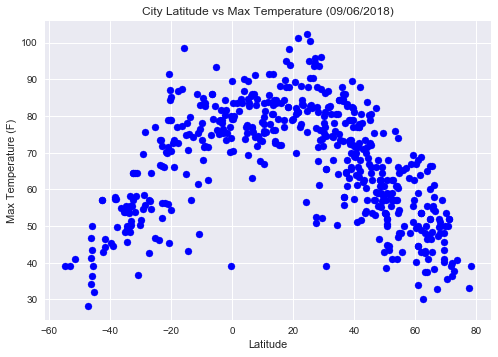

In [234]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["max_temp"], marker="o",c='blue',facecolor='light gray')

# Incorporate the other graph properties
title = f"City Latitude vs Max Temperature ({date2})"
plt.title(title)
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("MaxTemperatureinCityLatitude.png")

# Show plot
plt.show()

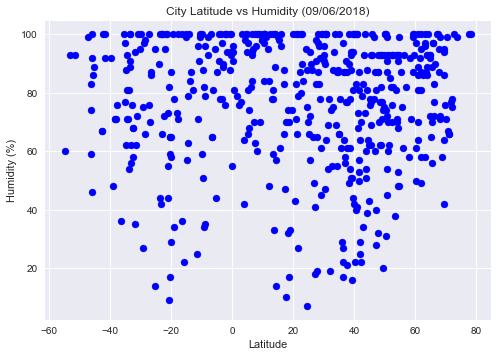

In [235]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o",c='blue')

# Incorporate the other graph properties
title = f"City Latitude vs Humidity ({date2})"
plt.title(title)
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityinCityLatitude.png")

# Show plot
plt.show()

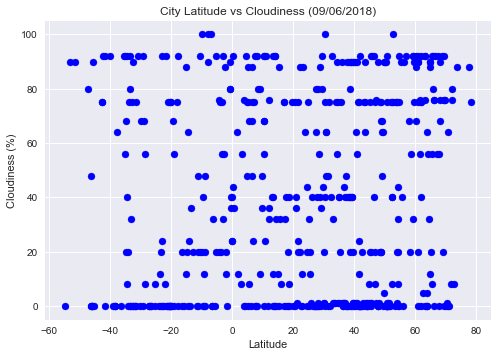

In [236]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o",c='blue')

# Incorporate the other graph properties
title = f"City Latitude vs Cloudiness ({date2})"
plt.title(title)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessinCityLatitude.png")

# Show plot
plt.show()

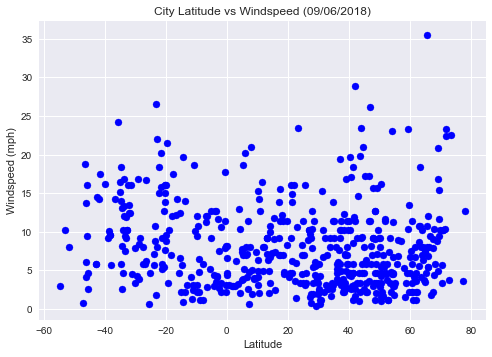

In [237]:
# Build a scatter plot for each data type
plt.scatter(weather_data["lat"], weather_data["wind_speed"], marker="o",c='blue')

# Incorporate the other graph properties
title = f"City Latitude vs Windspeed ({date2})"
plt.title(title)
plt.ylabel("Windspeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindspeedinCityLatitude.png")

# Show plot
plt.show()